In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

%matplotlib inline

In [3]:
df = pd.read_csv("sonnett.csv").sample(frac=.1)

In [4]:
df['is_reverse'] = df['is_reverse'].apply(lambda x: int(x))

In [5]:
df['target'] = df['is_reverse']

In [6]:
features = df.columns[5:-1]

In [7]:
df.describe()

,is_reverse,percent_of_ions_matched,Total Ions,Obs m/z,z,PPM,XCorr,delta_xcorr,relative_elution_time,pep_len,has_oxidized_met,num_missed_cleavages,Sp,unique_delta_expect,Expect,Expect.1,target
count,53670.000000,53670.000000,53670.000000,53670.000000,53670.0,53670.000000,53670.000000,53670.000000,53670.000000,53670.000000,53670.000000,53670.000000,53670.000000,53670.000000,53670.00000,5.367000e+04,53670.000000
mean,0.226607,0.492078,22.896404,904.560113,2.0,-15.068734,1.828223,0.285883,0.545304,12.448202,0.167095,0.272424,288.244390,0.284890,7.43516,6.596437e+00,0.226607
std,0.418640,0.300522,8.328941,226.095407,0.0,859.469207,1.071327,0.245463,0.277454,4.164470,0.373064,0.494579,347.900621,0.246105,3.93778,4.495679e+01,0.418640
min,0.000000,0.000000,10.000000,500.271550,2.0,-2491.740000,0.000000,0.000000,0.000222,6.000000,0.000000,0.000000,0.000000,0.000000,2.00000,2.500000e-26,0.000000
25%,0.000000,0.222222,16.000000,716.934168,2.0,-29.545000,1.000000,0.054000,0.309479,9.000000,0.000000,0.000000,36.300000,0.055000,4.29200,1.100000e-05,0.000000
50%,0.000000,0.437500,22.000000,879.513120,2.0,-1.255000,1.496000,0.213000,0.561285,12.000000,0.000000,0.000000,128.900000,0.207000,5.70600,2.000000e-01,0.000000
75%,0.000000,0.777778,28.000000,1080.118422,2.0,3.267500,2.592000,0.516000,0.786949,15.000000,0.000000,0.000000,443.800000,0.515000,9.95500,5.100000e+00,0.000000
max,1.000000,1.000000,60.000000,1399.707280,2.0,2503.810000,6.447000,1.000000,0.999889,31.000000,1.000000,2.000000,3976.900000,0.862000,30.59500,1.000000e+03,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

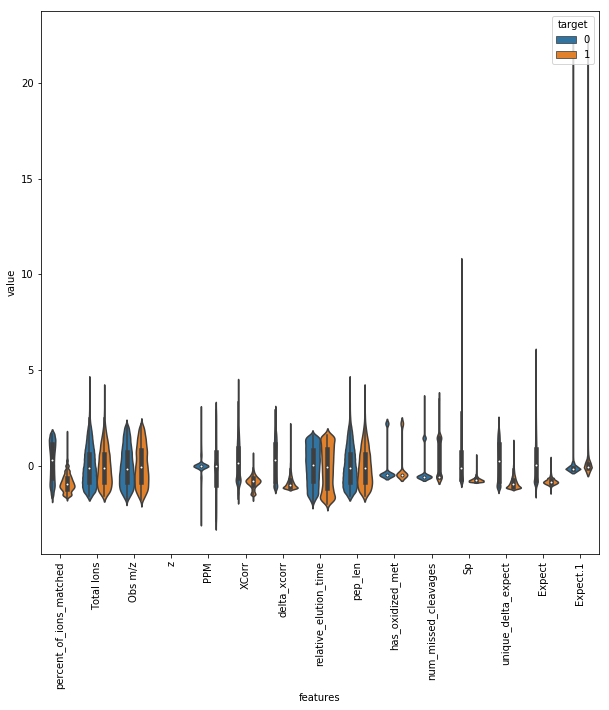

In [8]:
# make df of just features and target
data = df[features]

# standardize data by subtracting mean and dividing by standard deviation

standardized_data = (data - data.mean()) / data.std()

data = pd.concat([standardized_data, df['target']], axis=1)

# 'melt' dataframe into one target column and one features column -- for boxplotting etc.
data = pd.melt(data,
               id_vars="target",
               var_name="features",
               value_name='value')
#

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data)
#sns.boxplot(x="features", y="value", hue="target", data=data)
plt.xticks(rotation=90)

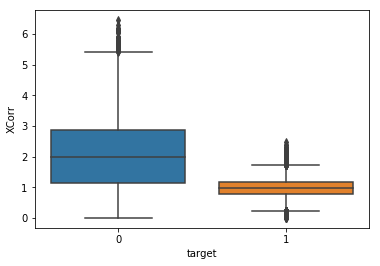

In [9]:
# plot individual variables by target

ax = sns.boxplot(x="target", # category
                 y="XCorr", # variable to plot
                 data=df) # dataframe

In [10]:
X = df[features]
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [12]:
svm = svm.SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.77150096884781638

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.76665672976598598

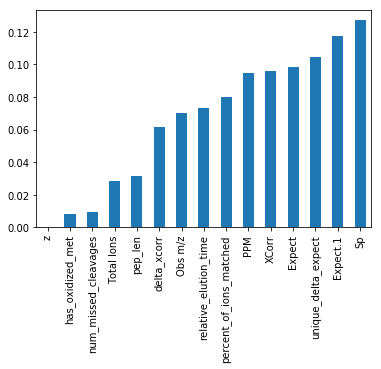

In [122]:
# make series of feature importance and plot

features = pd.Series(rfc.feature_importances_, # weights are the values in the series
                     index=df.columns[5:-1]) # feature names are the index, show up as labels on the plot

features = features.sort_values()

features.plot(kind='bar')

In [1]:
df.plot.scatter(x='Total Ions', y = 'Obs m/z')
df.plot.scatter(x='Total Ions', y = 'z')
df.plot.scatter(x='Total Ions', y = 'PPM')
df.plot.scatter(x='Total Ions', y = 'pep_len')

NameError: name 'df' is not defined

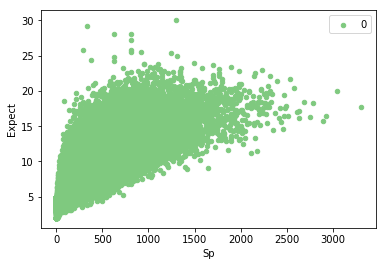

In [123]:
# plot different variables

show_x = 'Sp'
show_y = 'Expect'

ax = df[df['target'] == 0].plot.scatter(x = show_x,
                                             y = show_y,
                                             color = '#7fc97f',
                                             label = 0)

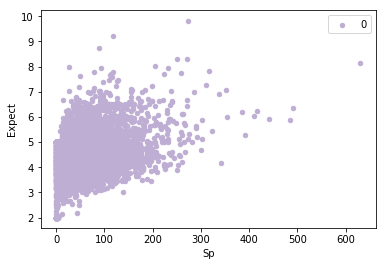

In [124]:
ax = df[df['target'] == 1].plot.scatter(x = show_x,
                                             y = show_y,
                                             color = '#beaed4',
                                             label = 0)

In [125]:
sp = pd.Series(df['Sp'].values, index=df['target'])

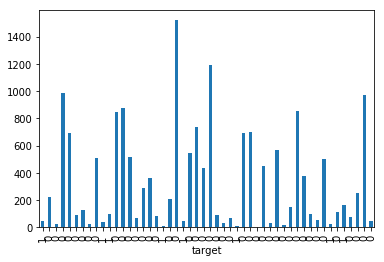

In [127]:
sp.iloc[:50].plot(kind='bar')

In [128]:
df['Sp'].unique()

array([   45.2,   223.7,    26.2, ...,  1584.2,   809. ,   607.5])

In [129]:
df.groupby(['Sp'])['target'].count()

Sp
0.0       154
0.2         3
0.3         4
0.4        13
0.5        15
0.6        37
0.7        42
0.8        49
0.9        59
1.0        61
1.1        79
1.2        76
1.3        90
1.4       103
1.5       113
1.6       109
1.7        86
1.8        90
1.9        93
2.0        86
2.1        87
2.2        65
2.3        88
2.4        82
2.5        71
2.6        77
2.7        67
2.8        63
2.9        73
3.0        57
         ... 
2303.3      1
2303.7      1
2312.1      1
2313.2      1
2326.3      1
2338.9      1
2350.3      1
2366.0      1
2396.0      1
2413.9      1
2419.8      1
2437.8      1
2456.0      1
2466.2      1
2469.9      1
2480.1      1
2494.0      1
2512.7      1
2532.7      1
2572.9      1
2605.9      1
2625.6      1
2627.0      1
2683.7      1
2748.7      1
2785.8      1
2889.4      1
2918.3      1
3037.4      1
3296.8      1
Name: target, Length: 11122, dtype: int64

In [130]:
df.groupby(['target'])['XCorr'].mean()

target
0    2.082015
1    0.951492
Name: XCorr, dtype: float64

In [131]:
df[df['target'] == 0].describe()

,is_reverse,percent_of_ions_matched,Total Ions,Obs m/z,z,PPM,XCorr,delta_xcorr,relative_elution_time,pep_len,has_oxidized_met,num_missed_cleavages,Sp,unique_delta_expect,Expect,Expect.1,target
count,41461.0,41461.000000,41461.000000,41461.000000,41461.0,41461.000000,41461.000000,41461.000000,41461.000000,41461.000000,41461.000000,41461.000000,41461.000000,41461.000000,41461.000000,4.146100e+04,41461.0
mean,0.0,0.565936,22.928005,900.905055,2.0,9.713973,2.082015,0.346484,0.553396,12.464002,0.167193,0.198066,358.058834,0.345167,8.314956,4.770574e+00,0.0
std,0.0,0.293197,8.392135,224.221725,0.0,723.042505,1.073972,0.243183,0.266568,4.196068,0.373153,0.431666,364.098426,0.244614,4.027655,4.015750e+01,0.0
min,0.0,0.000000,10.000000,500.250500,2.0,-2491.290000,0.000000,0.000000,0.000333,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.600000e-26,0.0
25%,0.0,0.300000,16.000000,716.469080,2.0,-2.340000,1.155000,0.098000,0.331704,9.000000,0.000000,0.000000,59.300000,0.097000,4.652000,9.600000e-07,0.0
50%,0.0,0.590909,22.000000,874.501930,2.0,-1.210000,1.977000,0.362000,0.566396,12.000000,0.000000,0.000000,257.800000,0.354000,7.533000,2.900000e-03,0.0
75%,0.0,0.833333,28.000000,1073.998790,2.0,0.000000,2.860000,0.565000,0.781420,15.000000,0.000000,0.000000,539.700000,0.566000,11.018000,2.200000e+00,0.0
max,0.0,1.000000,60.000000,1399.718020,2.0,2505.050000,6.301000,1.000000,0.999889,31.000000,1.000000,2.000000,3296.800000,0.854000,30.019000,1.000000e+03,0.0


In [132]:
df[df['target'] == 1].describe()

,is_reverse,percent_of_ions_matched,Total Ions,Obs m/z,z,PPM,XCorr,delta_xcorr,relative_elution_time,pep_len,has_oxidized_met,num_missed_cleavages,Sp,unique_delta_expect,Expect,Expect.1,target
count,12209.0,12209.000000,12209.000000,12209.000000,12209.0,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.0
mean,1.0,0.238061,22.679007,913.764678,2.0,-60.480808,0.951492,0.077341,0.517258,12.339504,0.179048,0.513556,44.307527,0.076858,4.339875,12.419246,1.0
std,0.0,0.144338,8.017219,229.723129,0.0,1202.575846,0.342632,0.083518,0.305368,4.008610,0.383408,0.584168,41.539811,0.076820,0.643554,49.522913,0.0
min,1.0,0.000000,10.000000,500.217230,2.0,-2491.930000,0.000000,0.000000,0.000111,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000015,1.0
25%,1.0,0.138889,16.000000,720.943340,2.0,-812.570000,0.780000,0.017000,0.228359,9.000000,0.000000,0.000000,16.300000,0.017000,3.924000,2.100000,1.0
50%,1.0,0.214286,22.000000,894.478660,2.0,-5.100000,0.987000,0.052000,0.529503,12.000000,0.000000,0.000000,34.400000,0.053000,4.268000,5.400000,1.0
75%,1.0,0.312500,28.000000,1096.071870,2.0,684.490000,1.162000,0.111000,0.789866,15.000000,0.000000,1.000000,59.900000,0.114000,4.670000,12.000000,1.0
max,1.0,1.000000,62.000000,1399.759890,2.0,2504.360000,2.891000,1.000000,0.999778,32.000000,1.000000,2.000000,630.500000,0.600000,9.830000,1000.000000,1.0


In [133]:
df['target'].value_counts()

0    41461
1    12209
Name: target, dtype: int64